# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [48]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
x_train_orig, y_train_orig = train['features'], train['labels']
x_test_orig, y_test_orig = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [58]:
import numpy as np
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = x_train_orig.shape[0]

# TODO: Number of testing examples.
n_test = x_test_orig.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = (x_train_orig.shape[1],x_train_orig.shape[2])

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train_orig).size

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

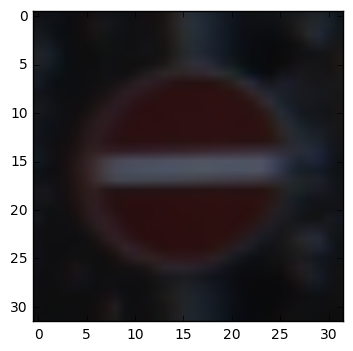

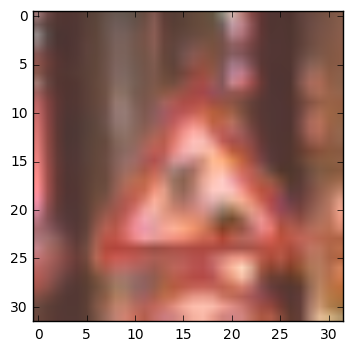

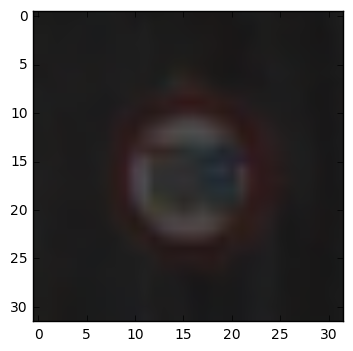

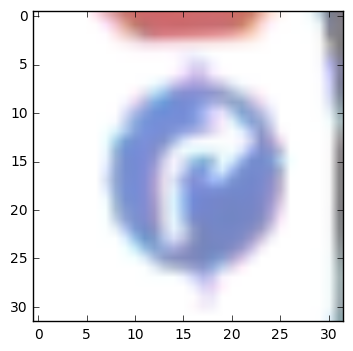

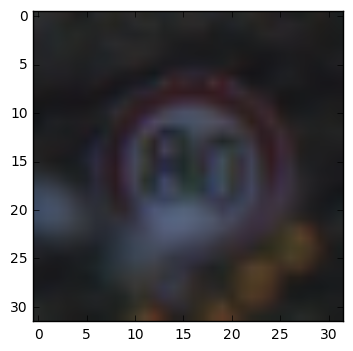

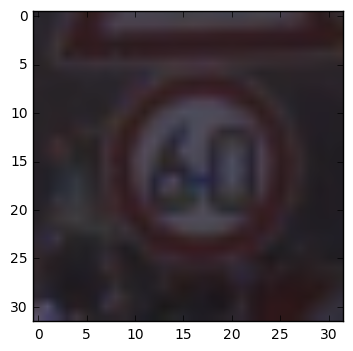

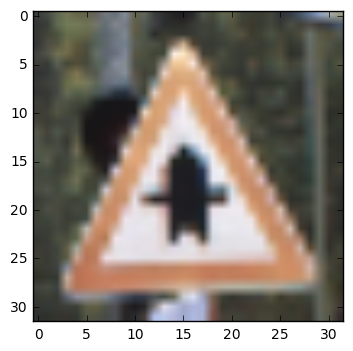

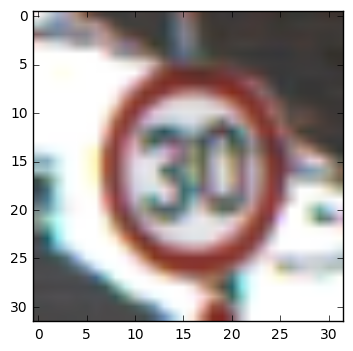

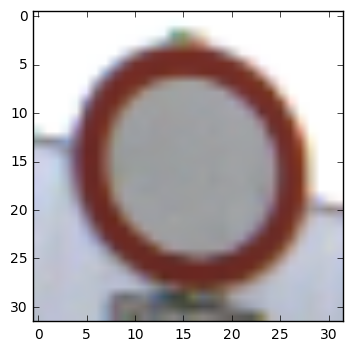

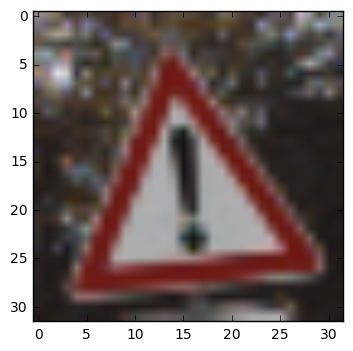

In [19]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
for i in np.random.randint(low=0, high=n_train-1, size=10):
    plt.imshow(X_train[i])
    plt.show()

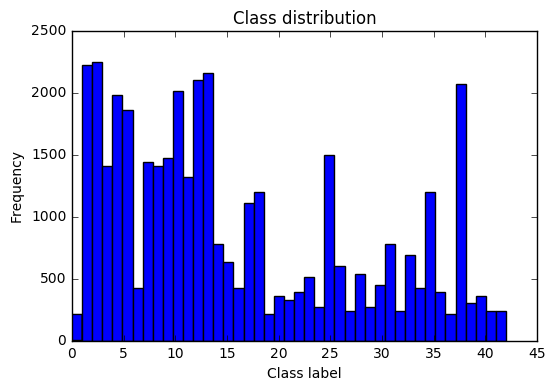

Ideal distribution should be :  91183.72093023256
Class  0  :  0.53559131832
Class  1  :  5.66196536509
Class  2  :  5.73847841057
Class  3  :  3.59611313729
Class  4  :  5.0498610013
Class  5  :  4.7438088194
Class  6  :  1.07118263664
Class  7  :  3.67262618276
Class  8  :  3.59611313729
Class  9  :  3.74913922824
Class  10  :  5.12637404677
Class  11  :  3.36657400087
Class  12  :  5.3559131832
Class  13  :  5.50893927415
Class  14  :  1.98933918233
Class  15  :  1.60677395496
Class  16  :  1.07118263664
Class  17  :  2.83098268255
Class  18  :  3.06052181897
Class  19  :  0.53559131832
Class  20  :  0.918156545691
Class  21  :  0.841643500217
Class  22  :  0.994669591165
Class  23  :  1.30072177306
Class  24  :  0.688617409268
Class  25  :  3.82565227371
Class  26  :  1.53026090949
Class  27  :  0.612104363794
Class  28  :  1.37723481854
Class  29  :  0.688617409268
Class  30  :  1.14769568211
Class  31  :  1.98933918233
Class  32  :  0.612104363794
Class  33  :  1.75724961106
Clas

In [134]:
def print_class_distribution():
    plt.hist(y_train_orig, bins=n_classes)
    plt.title("Class distribution")
    plt.xlabel("Class label")
    plt.ylabel("Frequency")
    plt.show()

    class_dist, classes = np.histogram(y_train_orig, bins=np.arange(n_classes+1), density=True)
    print("Ideal distribution should be : " , 100. / n_classes)
    for i in np.arange(n_classes):
        print("Class ", classes[i], " : ", class_dist[classes[i]] * 100.0)

print_class_distribution()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [116]:
### Preprocessing

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.utils import shuffle
def normalize(data):
    return (data.astype('float32') / 255.) - 0.5 

def label_binarizer(labels):
    lb = preprocessing.LabelBinarizer()
    lb.fit(labels)
    return lb

def preprocess(x_train, y_train, x_test, y_test):
    # Shuffle train data
    #x_train, y_train = shuffle(x_train, y_train, random_state = 636198)
    # Normalize
    x_train = normalize(x_train)
    x_test = normalize(x_test)
    # One hot encode labels
    lb = label_binarizer(y_train)
    y_train = lb.transform(y_train)
    y_test = lb.transform(y_test)
    # Split training set to training and validation
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.33, stratify = y_train ) 
    return x_train, x_val, x_test, y_train, y_val, y_test

print("Before pre processing shape of train and test dataset")
print(x_train_orig.shape, x_test_orig.shape)
x_train, x_val, x_test, y_train, y_val, y_test = preprocess(x_train_orig, y_train_orig, x_test_orig, y_test_orig)
print("After pre processing shape of train, validation and test dataset")
print(x_train.shape, x_val.shape, x_test.shape)

Before pre processing shape of train and test dataset
(39209, 32, 32, 3) (12630, 32, 32, 3)
After pre processing shape of train, validation and test dataset
(26270, 32, 32, 3) (12939, 32, 32, 3) (12630, 32, 32, 3)


In [110]:
### Model and architecture
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def LeNet(x_data):
    std = 0.01
    #Convolution layer 1. The output shape should be 32x32x6.
    conv1_filter_w = tf.Variable(tf.truncated_normal([5,5,3,6], stddev = std))
    conv1_filter_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x_data, conv1_filter_w, strides=[1, 1, 1, 1], padding='VALID') + conv1_filter_b
    # Activation 1. Your choice of activation function.
    conv1 = tf.nn.relu(conv1)
    # Pooling layer 1. The output shape should be 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    # Convolution layer 2. The output shape should be 10x10x16.
    conv2_filter_w = tf.Variable(tf.truncated_normal([5,5,6,16], stddev = std))
    conv2_filter_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(conv1, conv2_filter_w, strides=[1, 1, 1, 1], padding='VALID') + conv2_filter_b
    # Activation 2. Your choice of activation function.
    conv2 = tf.nn.relu(conv2)
    # Pooling layer 2. The output shape should be 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    # Flatten layer. Flatten the output shape of the final pooling layer
    # such that it's 1D instead of 3D. The easiest way to do is by using
    # tf.contrib.layers.flatten, which is already imported for you.
    flatten_conv2 = flatten(conv2)
    # Fully connected layer 1. This should have 120 outputs.
    # 5 * 5 * 16 flatten is 400
    fc1_input = flatten_conv2
    fc1_w = tf.Variable(tf.truncated_normal([400, 120], stddev = std))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1_output = tf.matmul(fc1_input, fc1_w) + fc1_b
    # Activation 3. Your choice of activation function.
    fc1_output = tf.nn.relu(fc1_output)
    # Fully connected layer 2. This should have n_classes outputs.
    fc2_w = tf.Variable(tf.truncated_normal([120, n_classes], stddev = std))
    fc2_b = tf.Variable(tf.zeros(n_classes))
    fc2_output = tf.matmul(fc1_output, fc2_w) + fc2_b
    return fc2_output

In [117]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.float32, (None, n_classes))

fc = LeNet(x)

loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(fc, y))
opt = tf.train.AdamOptimizer(learning_rate=0.001) 
train_op = opt.minimize(loss_op)
correct_prediction = tf.equal(tf.argmax(fc, 1), tf.argmax(y, 1))
accuracy_op = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [109]:
def next_batch(x_data, y_data, batch_size, step):
    batch_start = step*batch_size
    batch_x = x_data[batch_start:batch_start + batch_size]
    batch_y = y_data[batch_start:batch_start + batch_size]
    return batch_x, batch_y

def eval_data(x_data, y_data):
    """
    Given a dataset as input returns the loss and accuracy.
    """
    # If dataset.num_examples is not divisible by BATCH_SIZE
    # the remainder will be discarded.
    # Ex: If BATCH_SIZE is 64 and training set has 55000 examples
    # steps_per_epoch = 55000 // 64 = 859
    # num_examples = 859 * 64 = 54976
    #
    # So in that case we go over 54976 examples instead of 55000.
    steps_per_epoch = len(x_data) // BATCH_SIZE
    num_examples = steps_per_epoch * BATCH_SIZE
    total_acc, total_loss = 0, 0
    for step in range(steps_per_epoch):
        batch_x, batch_y = next_batch(x_data, y_data, BATCH_SIZE, step)
        loss, acc = sess.run([loss_op, accuracy_op], feed_dict={x: batch_x, y: batch_y})
        total_acc += (acc * batch_x.shape[0])
        total_loss += (loss * batch_x.shape[0])
    return total_loss/num_examples, total_acc/num_examples

In [118]:
EPOCHS = 10
BATCH_SIZE = 50
init = tf.initialize_all_variables()
with tf.Session() as sess:
    sess.run(init)
    # Integer division
    steps_per_epoch = len(x_train) // BATCH_SIZE
    num_examples = steps_per_epoch * BATCH_SIZE

    # Train model
    for i in range(EPOCHS):
        for step in range(steps_per_epoch):
            batch_x, batch_y = next_batch(x_train, y_train, BATCH_SIZE, step)
            loss = sess.run(train_op, feed_dict={x: batch_x, y: batch_y})

        val_loss, val_acc = eval_data(x_val, y_val)
        print("EPOCH {} ...".format(i+1))
        print("Validation loss = {:.3f}".format(val_loss))
        print("Validation accuracy = {:.3f}".format(val_acc))
        print()
        # Evaluate on the test data
    test_loss, test_acc = eval_data(x_test, y_test)
    print("Test loss = {:.3f}".format(test_loss))
    print("Test accuracy = {:.3f}".format(test_acc))

EPOCH 1 ...
Validation loss = 1.872
Validation accuracy = 0.416

EPOCH 2 ...
Validation loss = 0.896
Validation accuracy = 0.711

EPOCH 3 ...
Validation loss = 0.554
Validation accuracy = 0.824

EPOCH 4 ...
Validation loss = 0.394
Validation accuracy = 0.872

EPOCH 5 ...
Validation loss = 0.286
Validation accuracy = 0.912

EPOCH 6 ...
Validation loss = 0.226
Validation accuracy = 0.933

EPOCH 7 ...
Validation loss = 0.184
Validation accuracy = 0.950

EPOCH 8 ...
Validation loss = 0.154
Validation accuracy = 0.959

EPOCH 9 ...
Validation loss = 0.128
Validation accuracy = 0.967

EPOCH 10 ...
Validation loss = 0.118
Validation accuracy = 0.970

Test loss = 0.901
Test accuracy = 0.873


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
1. Normalized training and test dataset to have mean 0 and in the range 0 to 1
2. Splitted training data into train 2/3 and validation 1/3 set
3. One hot encoded the labels


Notes:
1. Tried genearting extra data but it takes too long, for example about 15 minutes for 1000 new images and it did not improve the accuracy. So skipped that. But it would have improved if I could generate 5 images for each image in training set as suggested the paper.
2. Tried RGB to YUV conversion. Does not help

In [ ]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
### Preprocessing

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.utils import shuffle
def normalize(data):
    return (data.astype('float32') / 255.) - 0.5 

def label_binarizer(labels):
    lb = preprocessing.LabelBinarizer()
    lb.fit(labels)
    return lb

def preprocess(x_train, y_train, x_test, y_test):
    # Shuffle train data
    #x_train, y_train = shuffle(x_train, y_train, random_state = 636198)
    # Normalize
    x_train = normalize(x_train)
    x_test = normalize(x_test)
    # One hot encode labels
    lb = label_binarizer(y_train)
    y_train = lb.transform(y_train)
    y_test = lb.transform(y_test)
    # Split training set to training and validation
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.33, stratify = y_train ) 
    return x_train, x_val, x_test, y_train, y_val, y_test

print("Before pre processing shape of train and test dataset")
print(x_train_orig.shape, x_test_orig.shape)
x_train, x_val, x_test, y_train, y_val, y_test = preprocess(x_train_orig, y_train_orig, x_test_orig, y_test_orig)
print("After pre processing shape of train, validation and test dataset")
print(x_train.shape, x_val.shape, x_test.shape)

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
1. Splitted training data into train 2/3 and validation 1/3 set
2. Used LeNet architecture. 
  1. Conv layers having 6 and 16 filters of size 5x5 on 3 channels having strides of (1,1,1,1).
  2. 1 max pool layer of strides (1,2,2,1)
  3. 2 Fully connected layers connecting 400x120x43 nodes
  4. Relu as non linear function

In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
def LeNet(x_data):
    std = 0.01
    #Convolution layer 1. The output shape should be 32x32x6.
    conv1_filter_w = tf.Variable(tf.truncated_normal([5,5,3,6], stddev = std))
    conv1_filter_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x_data, conv1_filter_w, strides=[1, 1, 1, 1], padding='VALID') + conv1_filter_b
    # Activation 1. Your choice of activation function.
    conv1 = tf.nn.relu(conv1)
    # Pooling layer 1. The output shape should be 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    # Convolution layer 2. The output shape should be 10x10x16.
    conv2_filter_w = tf.Variable(tf.truncated_normal([5,5,6,16], stddev = std))
    conv2_filter_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(conv1, conv2_filter_w, strides=[1, 1, 1, 1], padding='VALID') + conv2_filter_b
    # Activation 2. Your choice of activation function.
    conv2 = tf.nn.relu(conv2)
    # Pooling layer 2. The output shape should be 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    # Flatten layer. Flatten the output shape of the final pooling layer
    # such that it's 1D instead of 3D. The easiest way to do is by using
    # tf.contrib.layers.flatten, which is already imported for you.
    flatten_conv2 = flatten(conv2)
    # Fully connected layer 1. This should have 120 outputs.
    # 5 * 5 * 16 flatten is 400
    fc1_input = flatten_conv2
    fc1_w = tf.Variable(tf.truncated_normal([400, 120], stddev = std))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1_output = tf.matmul(fc1_input, fc1_w) + fc1_b
    # Activation 3. Your choice of activation function.
    fc1_output = tf.nn.relu(fc1_output)
    # Fully connected layer 2. This should have n_classes outputs.
    fc2_w = tf.Variable(tf.truncated_normal([120, n_classes], stddev = std))
    fc2_b = tf.Variable(tf.zeros(n_classes))
    fc2_output = tf.matmul(fc1_output, fc2_w) + fc2_b
    return fc2_output

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
1. Used LeNet architecture. 
  1. Conv layers having 6 and 16 filters of size 5x5 on 3 channels having strides of (1,1,1,1). Tried 108-200, 108-108 filters as suggested in the paper but did not improve.
  2. 1 max pool layer of strides (1,2,2,1)
  3. 2 Fully connected layers connecting 400x120x43 nodes
  4. Relu as non linear function

In [ ]:
### Train your model here.
### Feel free to use as many code cells as needed.
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.float32, (None, n_classes))

fc = LeNet(x)

loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(fc, y))
opt = tf.train.AdamOptimizer(learning_rate=0.001) 
train_op = opt.minimize(loss_op)
correct_prediction = tf.equal(tf.argmax(fc, 1), tf.argmax(y, 1))
accuracy_op = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [ ]:
def next_batch(x_data, y_data, batch_size, step):
    batch_start = step*batch_size
    batch_x = x_data[batch_start:batch_start + batch_size]
    batch_y = y_data[batch_start:batch_start + batch_size]
    return batch_x, batch_y

def eval_data(x_data, y_data):
    """
    Given a dataset as input returns the loss and accuracy.
    """
    # If dataset.num_examples is not divisible by BATCH_SIZE
    # the remainder will be discarded.
    # Ex: If BATCH_SIZE is 64 and training set has 55000 examples
    # steps_per_epoch = 55000 // 64 = 859
    # num_examples = 859 * 64 = 54976
    #
    # So in that case we go over 54976 examples instead of 55000.
    steps_per_epoch = len(x_data) // BATCH_SIZE
    num_examples = steps_per_epoch * BATCH_SIZE
    total_acc, total_loss = 0, 0
    for step in range(steps_per_epoch):
        batch_x, batch_y = next_batch(x_data, y_data, BATCH_SIZE, step)
        loss, acc = sess.run([loss_op, accuracy_op], feed_dict={x: batch_x, y: batch_y})
        total_acc += (acc * batch_x.shape[0])
        total_loss += (loss * batch_x.shape[0])
    return total_loss/num_examples, total_acc/num_examples

In [ ]:
EPOCHS = 10
BATCH_SIZE = 50
init = tf.initialize_all_variables()
with tf.Session() as sess:
    sess.run(init)
    # Integer division
    steps_per_epoch = len(x_train) // BATCH_SIZE
    num_examples = steps_per_epoch * BATCH_SIZE

    # Train model
    for i in range(EPOCHS):
        for step in range(steps_per_epoch):
            batch_x, batch_y = next_batch(x_train, y_train, BATCH_SIZE, step)
            loss = sess.run(train_op, feed_dict={x: batch_x, y: batch_y})

        val_loss, val_acc = eval_data(x_val, y_val)
        print("EPOCH {} ...".format(i+1))
        print("Validation loss = {:.3f}".format(val_loss))
        print("Validation accuracy = {:.3f}".format(val_acc))
        print()
        # Evaluate on the test data
    test_loss, test_acc = eval_data(x_test, y_test)
    print("Test loss = {:.3f}".format(test_loss))
    print("Test accuracy = {:.3f}".format(test_acc))

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
1. Used AdamOptimizer with learning rate 0.001. 
2. Batch size is 50. Tried 100, 64, 128 but 50 looks to be the best both for run time and accuracy 
3. Ran on 10 epochs. Tried 15, 20, 25, 30, 50, 100 but does not improve much. Very small improvemt on validation accuracy (about 0.1 %) but test accuracy is not improved

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
1. Normalized the dataset
2. One hot encoded the labels
3. Splitted training set into train and validation set
4. Implemented LeNet architecture for initial run and ran it for batch_size=50 and epochs=10. Results are validation accuracy = 97% and test accuracy = 87.3%
5. Then tried generating augmented data but 1000 new images took ~15 minutes everytime and it does ot improve the performance. So kipped it
6. Tried shuffling the data before splitting into train and validation set as well beore batch processing but it did not improve.
7. Changed model architecture to follow the several configuration presented in the paper using YUV convertion but it did not improve much, about 95% validation accuracy and 86% test accuracy
8. Tried several epochs and batch size configuration but did not improve.
9. Conclusion
  1. the structure of sermanet paper might have improved the performance if it was possible to generate at least 5 images (jittered, scaled and distorted) per training data because test set contains malformed images like real life scenario.
  2. LeNet is already a proven architecture to classify images with a very small parameter values which fits well for a low configuration machine thus does a pretty good job. 

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.